## Task Details
### Our top priority in this health problem is to identify patients with a stroke.

Expected Submission
Solve the task primarily using Notebooks.
The solution should contain two columns:
* id
* Stroke

Evaluation
Evaluation using F1-Score (given the output class imbalance)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
steps_to_take = [
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

# 1. Get the data ready

In [3]:
missing_values = ["n/a", "na", "--"]
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv', na_values=missing_values)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Check for null values
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We have 201 missing values in the bmi column

In [7]:
data.shape

(5110, 12)

We have 5110 rows of data and 12 columns

In [8]:
data.drop('id', axis=1, inplace=True)

In [9]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
# Fill missing data with the mean value using numpy
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [11]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [13]:
data['gender'] = data['gender'].replace({'Male': 1, 'Female':0, 'Other':1})
data['Residence_type'] = data['Residence_type'].replace({'Urban':1, 'Rural':0})
data['ever_married'] = data['ever_married'].replace({'Yes':1, 'No':0})

In [14]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


## Exploratory Data Analysis (EDA)

In [15]:
# Find the correlations between our independent variables
df_corr = data.corr()
df_corr

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
gender,1.000000,-0.027924,0.021143,0.085617,-0.030483,-0.006340,0.054902,-0.025797,0.009027
age,-0.027924,1.000000,0.276398,0.263796,0.679125,0.014180,0.238171,0.325942,0.245257
hypertension,0.021143,0.276398,1.000000,0.108306,0.164243,-0.007913,0.174474,0.160189,0.127904
heart_disease,0.085617,0.263796,0.108306,1.000000,0.114644,0.003092,0.161857,0.038899,0.134914
ever_married,-0.030483,0.679125,0.164243,0.114644,1.000000,0.006261,0.155068,0.335705,0.108340
Residence_type,-0.006340,0.014180,-0.007913,0.003092,0.006261,1.000000,-0.004946,-0.000120,0.015458
avg_glucose_level,0.054902,0.238171,0.174474,0.161857,0.155068,-0.004946,1.000000,0.168751,0.131945
bmi,-0.025797,0.325942,0.160189,0.038899,0.335705,-0.000120,0.168751,1.000000,0.038947
stroke,0.009027,0.245257,0.127904,0.134914,0.108340,0.015458,0.131945,0.038947,1.000000


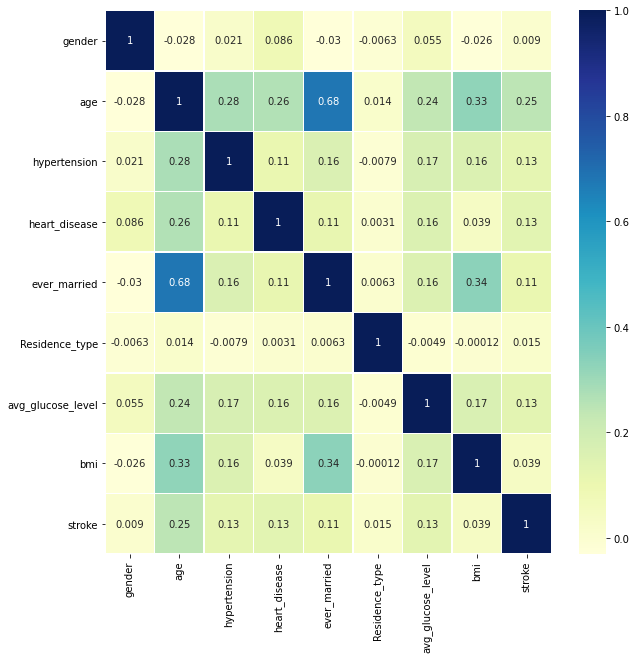

In [16]:
# Plot the correlation 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df_corr, annot=True, cmap="YlGnBu", linewidths=0.5)

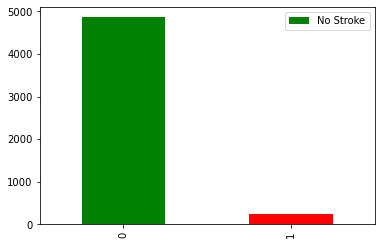

In [17]:
data['stroke'].value_counts().plot(kind='bar', color=["green", "red"]);
plt.legend(['No Stroke']);

A large proportion of our patients do not have stroke

In [18]:
data.gender.value_counts()

0    2994
1    2116
Name: gender, dtype: int64

In [19]:
# Stroke according to gender
stroke_gender = pd.crosstab(data['stroke'], data['gender'])
print(stroke_gender)

gender     0     1
stroke            
0       2853  2008
1        141   108


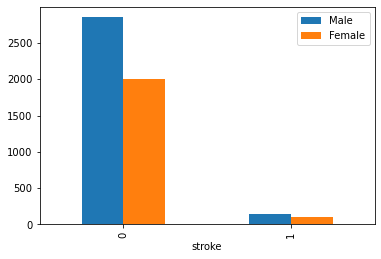

In [20]:
stroke_gender.plot(kind='bar')
plt.legend(['Male', 'Female']);

In [21]:
# Stroke according to residence type
residence_stroke = pd.crosstab(data['Residence_type'], data['stroke'])
residence_stroke

stroke,0,1
Residence_type,,
0,2400,114
1,2461,135


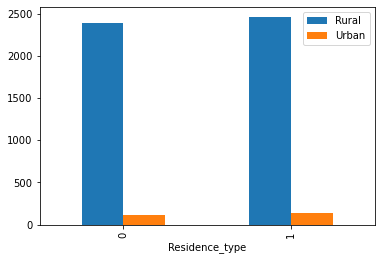

In [22]:
residence_stroke.plot(kind='bar')
plt.legend(['Rural','Urban']);

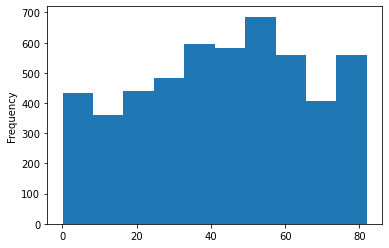

In [23]:
data['age'].plot.hist();

# 2. Choose the right estimator/algorithm for our problem

In [24]:
# X.head()

In [25]:
# Shuffle our data for randomness
data_shuffled = data.sample(frac=1)

# Split into X (Features) and y (label)
X = data_shuffled.drop('stroke', axis=1)
y = np.array(data_shuffled['stroke'])

# Convert our X data into numeric data and into a numpy array
X = np.array(pd.get_dummies(X))

In [26]:
X.T

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [81., 72., 24., ..., 26., 26., 63.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [27]:
# Split into train and test set

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# 3. Fit the model/algorithm and use it to make predictions on our data

In [28]:
# Now that we have data ready, let's try a few classification algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LinearSVC': LinearSVC(),
    'KNeigborsClassifier': KNeighborsClassifier()
}

def fit_and_train(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    
    score = {}
    for k,model in models.items():
        model.fit(x_train, y_train)
        score[k]= model.score(x_test, y_test)
    return score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [29]:
model_scores = fit_and_train(models,X_train, X_test, y_train, y_test)
model_scores

/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'RandomForestClassifier': 0.9481409001956947,
 'LinearSVC': 0.6046966731898239,
 'KNeigborsClassifier': 0.9471624266144814}

# 4. Evaluating a model

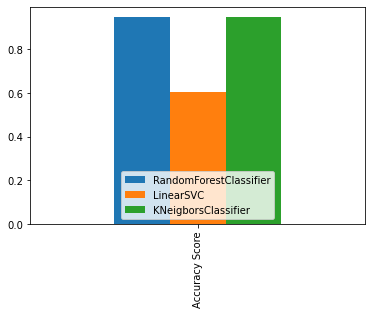

In [30]:
# Let's plot the graph to compare

scores = pd.DataFrame(model_scores, index=['Accuracy Score'])

scores.plot(kind='bar')
plt.legend(loc='lower center');

From the above, we can see that `LinearSVC` and `RandomForestClassifier` did pretty well

Let's perform some hyperparameter tuning and cross validation on both models

In [31]:
# Hyperparameter tuning using RandomizedSearchCV for LinearSVC
lsvc_param_grid = {
    'C': np.logspace(1,10,20)
}

# Hyperparameter tuning using RandomizedSearchCV for RandomForestClassifier
rfc_param_grid = {
    'n_estimators': np.arange(10,100,10),
    'max_depth': [None, 3, 5, 7, 10],
    'max_features': ['auto','sqrt'],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

lsvc_rscv = RandomizedSearchCV(LinearSVC(), lsvc_param_grid, cv=5, n_iter=20, verbose=True)

lsvc_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear 

/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear

/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear

/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=20,
                   param_distributions={'C': array([1.00000000e+01, 2.97635144e+01, 8.85866790e+01, 2.63665090e+02,
       7.84759970e+02, 2.33572147e+03, 6.95192796e+03, 2.06913808e+04,
       6.15848211e+04, 1.83298071e+05, 5.45559478e+05, 1.62377674e+06,
       4.83293024e+06, 1.43844989e+07, 4.28133240e+07, 1.27427499e+08,
       3.79269019e+08, 1.12883789e+09, 3.35981829e+09, 1.00000000e+10])},
                   verbose=True)

In [32]:
lsvc_rscv.best_params_

{'C': 10.0}

In [33]:
lsvc_rscv.score(X_test,y_test)

0.952054794520548

Using RandomizedSearchCV we get a .95 accuracy for `LinearSVC` algorithm

In [34]:
# Using RandomForestClassifier
rfc_rscv = RandomizedSearchCV(RandomForestClassifier(), rfc_param_grid, cv=5, n_iter=20, verbose=True)

rfc_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [35]:
rfc_rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 3}

In [36]:
rfc_rscv.score(X_test,y_test)

0.952054794520548

In [41]:
# Let's make predictions using our model
y_preds = rfc_rscv.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

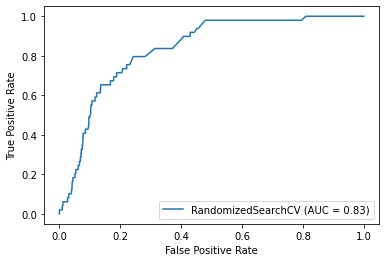

In [39]:
from sklearn.metrics import classification_report, plot_roc_curve, confusion_matrix

# Plot the roc_curve
plot_roc_curve(rfc_rscv, X_test, y_test);

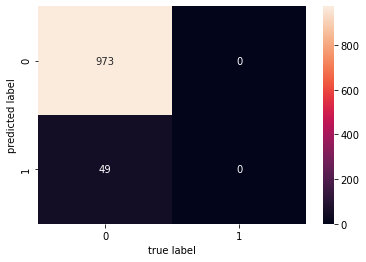

In [54]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

fig, ax = plt.subplots()
ax = sns.heatmap(conf_mat, annot=True, fmt='g')

plt.xlabel("true label")
plt.ylabel("predicted label");